# We started our midterm project to find a correlation between the happiness score of a country and it's economic strength in GDP Per Capita. The datasets we are using are the World Happiness Report from the year 2016. 

# Starting Hypotheses

## $H_{0}$: A stronger economy results in higher happiness score
## $H_{A}$: A stronger economy doesn't result in a higher happiness score

In [25]:
import numpy as np 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
# Import happiness dataset with pandas as "data_h"

data_h = pd.read_csv("../Midterm Project/2016.csv", sep= ',')

#We take out the upper and lower confidence interval columns because they are redundant 

data_h.drop(['Lower Confidence Interval', 'Upper Confidence Interval'], axis = 1, inplace = True)

In [3]:
# Rename column "Economy(GDP Per Capita)" to "Economy" for easy addressing

data_h = data_h.rename(columns={'Economy (GDP per Capita)': 'Economy'})

In [51]:
#Checking whether the changes to the dataset occurred and top 10 happiest countries

top_10 = data_h.head(10)
top_10

,Country,Region,Happiness Rank,Happiness Score,Economy,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [50]:
# What is the United States' ranking on data set?

data_h.loc[data_h['Country'] == 'United States']

,Country,Region,Happiness Rank,Happiness Score,Economy,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
12,United States,North America,13,7.104,1.50796,1.04782,0.779,0.48163,0.14868,0.41077,2.72782


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

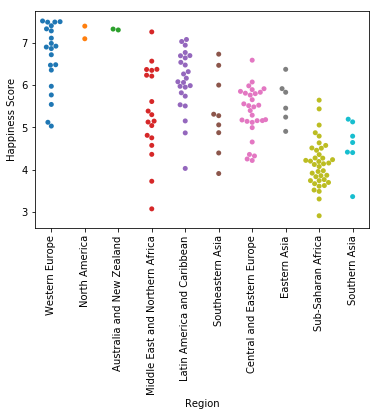

In [5]:
sns.swarmplot(x="Region", y="Happiness Score",  data=data_h)
plt.xticks(rotation=90)

### From the above swarmplot, we can tell that countries in Sub-Saharan Africa on average have some of the lowest happiness scores in the world. From our initial hypothesis, we can predict that countries from Sub-Saharan Africa will have weak economies. 

# Investigating the Economic Factor

### Let's start with a global snapshot of economies

In [43]:
data = dict(type = 'choropleth', 
           locations = data_h['Country'],
           locationmode = 'country names',
           z = data_h['Economy'], 
           text = data_h['Country'],
           colorscale = 'Jet', reversescale = True)
layout = dict(title = 'Global Economy 2016', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap = go.Figure(data = [data], layout=layout)
iplot(choromap)

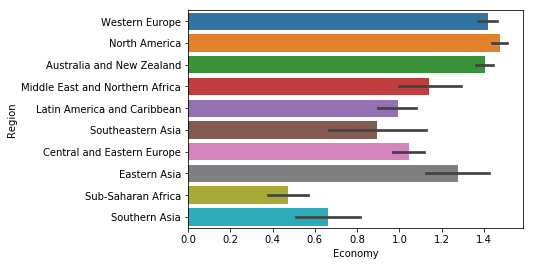

In [38]:
regional_econ = sns.barplot(data = data_h, x = "Economy", y = "Region",)

### As seen above, Sub-Saharan Africa as a region has the weakest economy among the other regions of the world, but this doesn't necessarily mean that our hypothesis is correct. To go deeper, we must investigate the correlation between the happiness score and the strength of the economy.

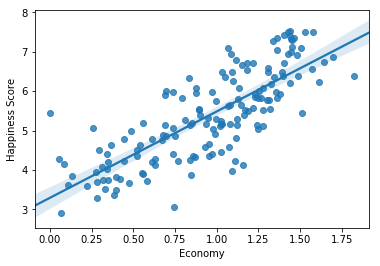

In [6]:
# We want to try and show a linear correlation between Economy and Happiness so we chose to plot a regression with those two
# variables in mind

sns.regplot(x='Economy',y='Happiness Score' ,data=data_h)

### The above regression plot shows an almost linear relation between economic strength and happiness 

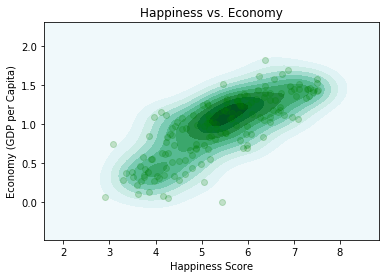

In [42]:
sns.kdeplot(data=data_h['Happiness Score'], data2=data_h['Economy'], shade=True)
happy_kde = plt.scatter(x=data_h['Happiness Score'], y=data_h['Economy'], alpha=0.2, color='green')
plt.xlabel('Happiness Score')
plt.ylabel('Economy (GDP per Capita)')
plt.title('Happiness vs. Economy')
plt.show()

## To further investigate the correlation between economic strength and all the other factors, we produced a correlation matrix of the different factors 

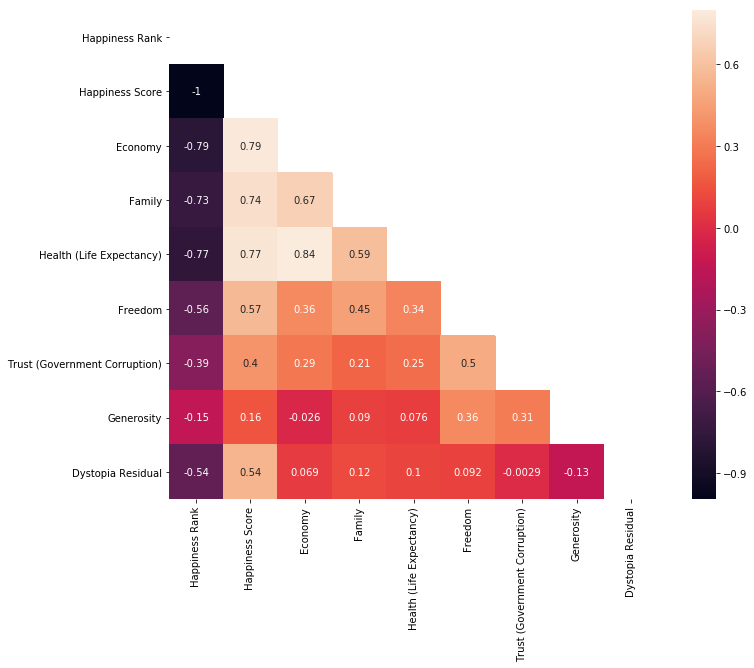

In [7]:
#correlation matrix
corrmat = data_h.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, mask=mask, vmax=.8, square=True, annot=True);

### According to the chart above, the 5 strongest correlations to Happiness Score are:
- Economy --> Happiness Score| 0.79
- Health (Life Expectancy) --> Happiness Score| 0.77
- Family --> Happiness Score| 0.74
- Freedom --> Happiness Score| 0.57
- Dystopia Residual --> Happiness Score| 0.54

In [22]:
# The 10 least happiest countries

low_h = data_h[-20:]
low_h

,Country,Region,Happiness Rank,Happiness Score,Economy,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
142,South Sudan,Sub-Saharan Africa,143,3.832,0.39394,0.18519,0.15781,0.19662,0.13015,0.25899,2.50929
143,Chad,Sub-Saharan Africa,144,3.763,0.42214,0.63178,0.03824,0.12807,0.04952,0.18667,2.30637
144,Burkina Faso,Sub-Saharan Africa,145,3.739,0.31995,0.63054,0.21297,0.33370,0.12533,0.24353,1.87319
145,Uganda,Sub-Saharan Africa,145,3.739,0.34719,0.90981,0.19625,0.43653,0.06442,0.27102,1.51416
146,Yemen,Middle East and Northern Africa,147,3.724,0.57939,0.47493,0.31048,0.22870,0.05892,0.09821,1.97295
147,Madagascar,Sub-Saharan Africa,148,3.695,0.27954,0.46115,0.37109,0.13684,0.07506,0.22040,2.15075
148,Tanzania,Sub-Saharan Africa,149,3.666,0.47155,0.77623,0.35700,0.31760,0.05099,0.31472,1.37769
149,Liberia,Sub-Saharan Africa,150,3.622,0.10706,0.50353,0.23165,0.25748,0.04852,0.24063,2.23284
150,Guinea,Sub-Saharan Africa,151,3.607,0.22415,0.31090,0.18829,0.30953,0.11920,0.29914,2.15604
151,Rwanda,Sub-Saharan Africa,152,3.515,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819


In [23]:
# The 10 weakest economies in the dataset

order_by_econ = data_h.sort_values('Economy', ascending= True)
order_by_econ[:20]

,Country,Region,Happiness Rank,Happiness Score,Economy,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
75,Somalia,Sub-Saharan Africa,76,5.440,0.00000,0.33613,0.11466,0.56778,0.31180,0.27225,3.83772
124,Congo (Kinshasa),Sub-Saharan Africa,125,4.272,0.05661,0.80676,0.18800,0.15602,0.06075,0.25458,2.74924
156,Burundi,Sub-Saharan Africa,157,2.905,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404
131,Malawi,Sub-Saharan Africa,132,4.156,0.08709,0.14700,0.29364,0.41430,0.07564,0.30968,2.82859
149,Liberia,Sub-Saharan Africa,150,3.622,0.10706,0.50353,0.23165,0.25748,0.04852,0.24063,2.23284
141,Niger,Sub-Saharan Africa,142,3.856,0.13270,0.60530,0.26162,0.38041,0.17176,0.20970,2.09469
150,Guinea,Sub-Saharan Africa,151,3.607,0.22415,0.31090,0.18829,0.30953,0.11920,0.29914,2.15604
96,Somaliland Region,Sub-Saharan Africa,97,5.057,0.25558,0.75862,0.33108,0.39130,0.36794,0.51479,2.43801
137,Comoros,Sub-Saharan Africa,138,3.956,0.27509,0.60323,0.29981,0.15412,0.18437,0.18270,2.25632
147,Madagascar,Sub-Saharan Africa,148,3.695,0.27954,0.46115,0.37109,0.13684,0.07506,0.22040,2.15075


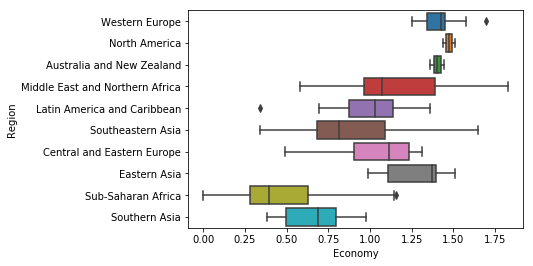

In [53]:
regional_econ = sns.boxplot(data = data_h, x = "Economy", y = "Region",)

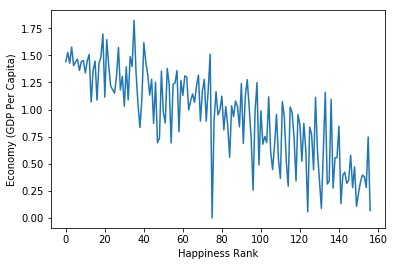

In [60]:
economy = data_h['Economy']
plt.plot(economy)
plt.xlabel('Happiness Rank')
plt.ylabel('Economy (GDP Per Capita)')
plt.show()